In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

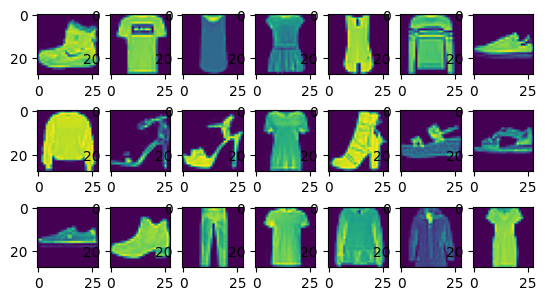

In [5]:
for i in range(21):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [3]:
input_shape = (28, 28, 1)

In [4]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [5]:
model = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [6]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
%%time

history = model.fit(x_train, y_train_cat, batch_size=12, epochs=8,validation_data =(x_test, y_test_cat) )

Epoch 1/8


5000/5000 [==============================] - 62s 12ms/step - loss: 0.4103 - accuracy: 0.8481 - val_loss: 0.3478 - val_accuracy: 0.8725
Epoch 2/8
5000/5000 [==============================] - 59s 12ms/step - loss: 0.2671 - accuracy: 0.9007 - val_loss: 0.2880 - val_accuracy: 0.8956
Epoch 3/8
5000/5000 [==============================] - 59s 12ms/step - loss: 0.2253 - accuracy: 0.9159 - val_loss: 0.2500 - val_accuracy: 0.9074
Epoch 4/8
5000/5000 [==============================] - 61s 12ms/step - loss: 0.1962 - accuracy: 0.9268 - val_loss: 0.2454 - val_accuracy: 0.9106
Epoch 5/8
5000/5000 [==============================] - 53s 11ms/step - loss: 0.1753 - accuracy: 0.9351 - val_loss: 0.2428 - val_accuracy: 0.9128
Epoch 6/8
5000/5000 [==============================] - 53s 11ms/step - loss: 0.1563 - accuracy: 0.9409 - val_loss: 0.2555 - val_accuracy: 0.9141
Epoch 7/8
5000/5000 [==============================] - 54s 11ms/step - loss: 0.1401 - accuracy: 0.9474 - val_loss: 0.2567 - val_

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [17]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
img = image.load_img('hw_3.png', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [24]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 33ms/step


In [25]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
print("Предсказанный класс: {}".format(class_names[predicted_class]))

Предсказанный класс: Dress
